# Titanic Classification

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix, classification_report




In [32]:
df=pd.read_csv("C:\DATA\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df2=df.drop("Cabin",axis=1)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [36]:
# seperate numerecal columns from the catigorical columns:
num_cols = df2.select_dtypes(include=['int64','float64']).columns
cat_cols = df2.select_dtypes(include=[object]).columns

<Axes: >

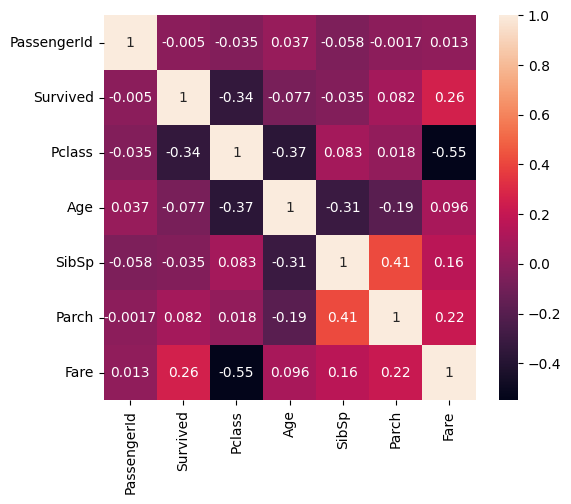

In [37]:
cmtx=df2[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(cmtx,annot=True)

In [39]:
avg=df2["Age"].mean()
df2["Age"]=df2["Age"].replace(np.nan,avg)

In [40]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [41]:
# Drop the null rows:
df2 = df2.dropna(subset=['Embarked'])

In [42]:
# Drop unessesary columns:

df2 = df2.drop(['Name','Ticket','PassengerId'],axis=1)

In [43]:
# seperate again the columns so we make sure we include all the columns:
num_cols = df2.select_dtypes(include=['int64','float64']).columns
cat_cols = df2.select_dtypes(include=[object]).columns

In [47]:
encoded_df= pd.get_dummies(df2,columns=cat_cols)
encoded_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [49]:
# assign X and Y values:
x = encoded_df.drop('Survived',axis=1)
y = encoded_df['Survived']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [51]:
scal = StandardScaler()

scaled_x_train = scal.fit_transform(x_train)
scaled_x_test = scal.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100,fit_intercept=True)
model.fit(scaled_x_train,y_train)

LogisticRegression()

In [53]:
Y_pred=model.predict(x_test)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
print("Accuracy:",accuracy_score(y_test,Y_pred))

Accuracy: 0.5955056179775281


In [57]:
print("Confusion matrix:",confusion_matrix(y_test,Y_pred))

Confusion matrix: [[104   1]
 [ 71   2]]


In [58]:
print("Classification report:",classification_report(y_test,Y_pred))

Classification report:               precision    recall  f1-score   support

           0       0.59      0.99      0.74       105
           1       0.67      0.03      0.05        73

    accuracy                           0.60       178
   macro avg       0.63      0.51      0.40       178
weighted avg       0.62      0.60      0.46       178



In [59]:
print("roc_score:",roc_auc_score(y_test,Y_pred))

roc_score: 0.5089367253750816
